# SpaceX Falcon 9 first stage Landing Prediction

In [67]:
# Required libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

### Data Collection & Cleaning

In [68]:
spacex_url="https://api.spacexdata.com/v4/launches/"
response = requests.get(spacex_url)
data = response.json()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

data = pd.DataFrame(data)

In [69]:
data.head()

,fairings,links,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id
0,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png', 'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a
1,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/f9/4a/ZboXReNb_o.png', 'large': 'https://images2.imgbox.com/80/a2/bkWotCIS_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=Lk4zQ2wP-Nc', 'youtube_id': 'Lk4zQ2wP-Nc', 'article': 'https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b
2,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/6c/cb/na1tzhHs_o.png', 'large': 'https://images2.imgbox.com/4a/80/k1oAkY0k_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=v0w9p3U8860', 'youtube_id': 'v0w9p3U8860', 'article': 'http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary', 'wikipedia': 'https://en.wikipedia.org/wiki/Trailblazer_(satellite)'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c
3,"{'reused': False, 'recovery_a

In [70]:
data.shape

(205, 27)

In [71]:
data.columns

Index(['fairings', 'links', 'static_fire_date_utc', 'static_fire_date_unix',
       'net', 'window', 'rocket', 'success', 'failures', 'details', 'crew',
       'ships', 'capsules', 'payloads', 'launchpad', 'flight_number', 'name',
       'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming',
       'cores', 'auto_update', 'tbd', 'launch_library_id', 'id'],
      dtype='object')

In [72]:
def get_BoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

def get_LaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

def get_Payloads(data):
    for x in data['payloads']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+x).json()
            Payload_Kg.append(response['mass_kg'])
            Orbit.append(response['orbit'])

def get_Core(data):
    for x in data['cores']:
        if x['core']!= None:
            response = requests.get("https://api.spacexdata.com/v4/cores/"+x['core']).json()
            Block.append(response['block'])
            Serial.append(response['serial'])
            
        else:
            Block.append(None)
            Serial.append(None)
        Gridfins.append(x['gridfins'])
        Legs.append(x['legs'])
        Reused.append(x['reused'])
        LandingAttempt.append(x['landing_attempt'])
        LandingType.append(x['landing_type'])
        SuccessLanding.append(str(x['landing_success']))
        Landpad.append(x['landpad'])

BoosterVersion = []
Block = []
Longitude =[]
Latitude = []
LaunchSite = []
Payload_Kg = []
Orbit = []
Serial = []
SuccessLanding = []
Landpad = []
Gridfins = []
Legs = []
Reused = []
LandingAttempt = []
LandingType = []

In [73]:
df = data[data['cores'].map(len)==1].copy()
df = data[data['payloads'].map(len)==1].copy()

df['cores'] = df['cores'].map(lambda x: x[0])
df['payloads'] = df['payloads'].map(lambda x: x[0])

df['Date'] = pd.to_datetime(df['date_utc']).dt.date
df.head()

,fairings,links,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,Date
0,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png', 'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cd9ffd86e000604b32a,2006-03-24
1,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/f9/4a/ZboXReNb_o.png', 'large': 'https://images2.imgbox.com/80/a2/bkWotCIS_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=Lk4zQ2wP-Nc', 'youtube_id': 'Lk4zQ2wP-Nc', 'article': 'https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cdaffd86e000604b32b,2007-03-21
3,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/95/39/sRqN7rsv_o.png', 'large': 'https://images2.imgbox.com/a3/99/qswRYzE8_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=dLQ2tZEH6G0', 'youtube_id': 'dLQ2tZEH6G0', 'article': 'https://en.wikipedia.org/wiki/Ratsat', 'wikipedia': 'https://en.wikipedia.org/wiki/Ratsat'}",2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cdbffd86e000604b32d,2008-09-28
4,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{

In [74]:
get_BoosterVersion(df)
get_Core(df)
get_LaunchSite(df)
get_Payloads(df)

In [75]:
data_dict = {
    "Date" : list(df['Date']),
    "Booster Version" : BoosterVersion,
    "Block" : Block,
    "Serial" : Serial,
    "Gridfins": Gridfins,
    "Legs": Legs,
    "Reused": Reused,
    "Longitude" : Longitude,
    "Latitude" : Latitude,
    "Launch Site" : LaunchSite,
    "Payload (Kg)" : Payload_Kg,
    "Orbit" : Orbit,
    "Landpad" : Landpad,
    "Landing Type": LandingType,
    "Landing Attempt": LandingAttempt,
    "Landing Success": SuccessLanding
}

In [76]:
for key, value in data_dict.items():
    print(f"Στήλη: {key}, Μήκος: {len(value)}")

Στήλη: Date, Μήκος: 180
Στήλη: Booster Version, Μήκος: 180
Στήλη: Block, Μήκος: 180
Στήλη: Serial, Μήκος: 180
Στήλη: Gridfins, Μήκος: 180
Στήλη: Legs, Μήκος: 180
Στήλη: Reused, Μήκος: 180
Στήλη: Longitude, Μήκος: 180
Στήλη: Latitude, Μήκος: 180
Στήλη: Launch Site, Μήκος: 180
Στήλη: Payload (Kg), Μήκος: 180
Στήλη: Orbit, Μήκος: 180
Στήλη: Landpad, Μήκος: 180
Στήλη: Landing Type, Μήκος: 180
Στήλη: Landing Attempt, Μήκος: 180
Στήλη: Landing Success, Μήκος: 180


In [137]:
spacex22 = pd.DataFrame(data_dict)

In [138]:
spacex22.head()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
0,2006-03-24,Falcon 1,NaN,Merlin1A,False,False,False,167.743129,9.047721,Kwajalein Atoll,20.0,LEO,None,None,False,None
1,2007-03-21,Falcon 1,NaN,Merlin2A,False,False,False,167.743129,9.047721,Kwajalein Atoll,NaN,LEO,None,None,False,None
2,2008-09-28,Falcon 1,NaN,Merlin2C,False,False,False,167.743129,9.047721,Kwajalein Atoll,165.0,LEO,None,None,False,None
3,2009-07-13,Falcon 1,NaN,Merlin3C,False,False,False,167.743129,9.047721,Kwajalein Atoll,200.0,LEO,None,None,False,None
4,2010-06-04,Falcon 9,1.0,B0003,False,False,False,-80.577366,28.561857,CCSFS SLC 40,NaN,LEO,None,None,False,None


In [110]:
spacex22.tail()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
175,2022-10-20,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,13260.0,VLEO,None,None,None,None
176,2022-11-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,5100.0,MEO,None,None,None,None
177,2022-12-01,Falcon 9,NaN,None,None,None,None,-120.610829,34.632093,VAFB SLC 4E,NaN,PO,None,None,None,None
178,2022-12-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,NaN,SSO,None,None,None,None
179,2022-12-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,5100.0,MEO,None,None,None,None


### Data Collection From Wikipedia

SpaceX's API is giving us some useful data, however the data is not updated. So, we will use a second way to collect data from 2022 until 2025. We are going to collect it from Wikipedia.

In [80]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches#Past_launches"
tables = pd.read_html(wiki_url)
t2023 = tables[0]
t2023.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,195,"Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare m

In [82]:
t2023.columns

Index(['Flight No.', 'Date and time (UTC)', 'Version, booster[f]',
       'Launch site', 'Payload[g]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')

In [83]:
# We keep the rows that start with Month's name
mask = t2023['Date and time (UTC)'].astype(str).str.match(r'^[A-Za-z]+\s+\d{1,2}')

t2023 = t2023[mask].copy()

# Τώρα df_clean περιέχει μόνο τις "κανονικές" γραμμές
t2023.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
2,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
4,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
5,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
6,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)


In [111]:
tables23_24_25 = []

def get_tables(df):
    for table in df[0:3]:

        # We keep the rows that start with Month's name
        date_col = table.columns[1]
        mask = table[date_col].astype(str).str.match(r'^[A-Za-z]+\s+\d{1,2}')
        
        table = table[mask].copy()
        tables23_24_25.append(table)

In [112]:
get_tables(tables)

In [113]:
tables23_24_25[1].head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,286,"January 3, 2024 03:44[229]",F9 B5 B1082.1,"Vandenberg, SLC‑4E",Starlink: Group 7-9 (22 satellites),"~16,800 kg (37,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
2,287,"January 3, 2024 23:04[230]",F9 B5 B1076.10,"Cape Canaveral, SLC‑40",Ovzon-3,"1,800 kg (4,000 lb)",GTO,Ovzon,Success,Success (LZ‑1)
4,288,"January 7, 2024 22:35[234]",F9 B5 B1067.16,"Cape Canaveral, SLC‑40",Starlink: Group 6-35 (23 satellites),"~17,100 kg (37,700 lb)",LEO,SpaceX,Success,Success (ASOG)
6,289,"January 14, 2024 08:59[236]",F9 B5 B1061.18,"Vandenberg, SLC‑4E",Starlink: Group 7-10 (22 satellites),"~16,700 kg (36,800 lb)",LEO,SpaceX,Success,Success (OCISLY)
8,290,"January 15, 2024 01:52[237]",F9 B5 B1073.12,"Cape Canaveral, SLC‑40",Starlink: Group 6-37 (23 satellites),"~17,100 kg (37,700 lb)",LEO,SpaceX,Success,Success (ASOG)


In [153]:
spacex23_25 = pd.concat(t232425, ignore_index=True)
spacex23_25

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
2,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
3,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
4,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)
...,...,...,...,...,...,...,...,...,...,...
279,451,"March 24, 2025 17:48[511]",F9 B5 B1092.2,"Cape Canaveral, SLC‑40",NROL-69,Unknown,LEO,USSF,Success,Success (LZ‑1)
280,452,"March 26, 2025 22:11[514]",F9 B5 B1063.24,"Vandenberg, SLC‑4E",Starlink: Group 11-7,"~15,500 kg (34,200 lb)",LEO,SpaceX,Success,Success (OCISLY)
281,453,"March 31, 2025 19:52[515]",F9 B5 B1080.17,"Cape Canaveral, SLC‑40",Starlink: Group 6-80,"~16,100 kg (35,500 lb)",LEO,SpaceX,Success,Success (JRTI)
282,454,"April 1, 2025 01:46[516]",F9 B5 B1085.6,"Kennedy, LC‑39A",Fram2 (Crew Dragon C207.4 Resilience),"~13,000 kg (29,000 lb)",Polar (Retrograde),Chun Wang,Success,Success (ASOG)


### Data Preparation

#### Data untill 2022

In [139]:
spacex22['Landing Type'].unique()

array([None, 'Ocean', 'ASDS', 'RTLS'], dtype=object)

In [140]:
# We keep only launches that attempted to land
spacex22 = spacex22[(spacex22['Landing Attempt'] == True) & (spacex22['Landing Type'] != 'Ocean')]

In [141]:
# We keep only Falcon9 launches as SpaceX ended the Falcon 1 program
spacex22 = spacex22[spacex22['Booster Version'] == 'Falcon 9']
spacex22.head()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
15,2015-01-10,Falcon 9,1.0,B1012,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2395.0,ISS,5e9e3032383ecb761634e7cb,ASDS,True,False
17,2015-04-14,Falcon 9,1.0,B1015,True,True,False,-80.577366,28.561857,CCSFS SLC 40,1898.0,ISS,5e9e3032383ecb761634e7cb,ASDS,True,False
19,2015-06-28,Falcon 9,1.0,B1018,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2477.0,ISS,5e9e3032383ecb6bb234e7ca,ASDS,True,None
20,2015-12-22,Falcon 9,1.0,B1019,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2034.0,LEO,5e9e3032383ecb267a34e7c7,RTLS,True,True
21,2016-01-17,Falcon 9,1.0,B1017,True,True,False,-120.610829,34.632093,VAFB SLC 4E,553.0,PO,5e9e3033383ecbb9e534e7cc,ASDS,True,False


In [142]:
spacex22.drop('Landpad', axis=1, inplace=True)
spacex22.reset_index(drop=True, inplace=True)
spacex22.head()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Attempt,Landing Success
0,2015-01-10,Falcon 9,1.0,B1012,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2395.0,ISS,ASDS,True,False
1,2015-04-14,Falcon 9,1.0,B1015,True,True,False,-80.577366,28.561857,CCSFS SLC 40,1898.0,ISS,ASDS,True,False
2,2015-06-28,Falcon 9,1.0,B1018,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2477.0,ISS,ASDS,True,None
3,2015-12-22,Falcon 9,1.0,B1019,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2034.0,LEO,RTLS,True,True
4,2016-01-17,Falcon 9,1.0,B1017,True,True,False,-120.610829,34.632093,VAFB SLC 4E,553.0,PO,ASDS,True,False


In [162]:
spacex22['Launch Site'].unique()

array(['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

#### Data 2023-2025

In [154]:
spacex23_25.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
2,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
3,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
4,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)


In [181]:
# We keep launches with only one core
spacex23_25['Flight No.'] = spacex23_25['Flight No.'].astype(str)
spacex23_25_filtered = spacex23_25[~spacex23_25['Flight No.'].str.startswith('FH')]
spacex23_25_filtered.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
5,197,"January 18, 2023 12:24[33]",F9 B5 B1077.2,"Cape Canaveral, SLC‑40",USA-343 (GPS-III SV06),"4,352 kg (9,595 lb)",MEO,USSF,Success,Success (JRTI)
6,198,"January 19, 2023 15:43[39]",F9 B5 B1075.1,"Vandenberg, SLC‑4E",Starlink: Group 2-4 (51 satellites),"15,000 kg (33,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
7,199,"January 26, 2023 09:32[40]",F9 B5 B1067.9,"Cape Canaveral, SLC‑40",Starlink: Group 5-2 (56 satellites),"~17,400 kg (38,400 lb)",LEO,SpaceX,Success,Success (JRTI)


In [182]:
print(spacex22.columns)
print(spacex23_25_filtered.columns)

Index(['Date', 'Booster Version', 'Block', 'Serial', 'Gridfins', 'Legs',
       'Reused', 'Longitude', 'Latitude', 'Launch Site', 'Payload (Kg)',
       'Orbit', 'Landing Type', 'Landing Attempt', 'Landing Success'],
      dtype='object')
Index(['Flight No.', 'Date and time (UTC)', 'Version, booster[f]',
       'Launch site', 'Payload[g]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')


In [183]:
spacex23_25_filtered['Launch site'].unique()

array(['Cape Canaveral, SLC‑40', 'Vandenberg, SLC‑4E', 'Kennedy, LC‑39A',
       'Vandenberg, SLC-4E',
       'Carried 2,762\xa0kg (6,089\xa0lb) of cargo and supplies to the International Space Station (ISS).[408] CRS-31 is the first Dragon scheduled to perform a test "reboost" of the ISS on November 8, 2024, burning its aft-facing Draco thrusters for 12.5 minutes to counteract atmospheric drag on the station.[409]',
       'Kennedy, LC‑39A[494]'], dtype=object)

In [184]:
spacex23_25_filtered = spacex23_25_filtered[spacex23_25_filtered['Launch site'].isin([
    'Cape Canaveral, SLC‑40',
    'Vandenberg, SLC‑4E',
    'Kennedy, LC‑39A',
    'Kennedy, LC‑39A[494]'
])]

In [185]:
spacex23_25_filtered.loc[spacex23_25_filtered['Launch site'].str.startswith('Cape'), 'Launch site'] = 'CCSFS SLC 40'
spacex23_25_filtered.loc[spacex23_25_filtered['Launch site'].str.startswith('Vandenberg'), 'Launch site'] = 'VAFB SLC 4E'
spacex23_25_filtered.loc[spacex23_25_filtered['Launch site'].str.startswith('Kennedy'), 'Launch site'] = 'KSC LC 39A'

In [186]:
spacex23_25_filtered.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,CCSFS SLC 40,Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,CCSFS SLC 40,OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
5,197,"January 18, 2023 12:24[33]",F9 B5 B1077.2,CCSFS SLC 40,USA-343 (GPS-III SV06),"4,352 kg (9,595 lb)",MEO,USSF,Success,Success (JRTI)
6,198,"January 19, 2023 15:43[39]",F9 B5 B1075.1,VAFB SLC 4E,Starlink: Group 2-4 (51 satellites),"15,000 kg (33,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
7,199,"January 26, 2023 09:32[40]",F9 B5 B1067.9,CCSFS SLC 40,Starlink: Group 5-2 (56 satellites),"~17,400 kg (38,400 lb)",LEO,SpaceX,Success,Success (JRTI)


In [187]:
spacex23_25_filtered.drop('Flight No.', axis=1, inplace=True)

In [191]:
spacex23_25_filtered['Date'] = spacex23_25_filtered['Date and time (UTC)']
spacex23_25_filtered['Date']

0       January 3, 2023 14:56[17]
1      January 10, 2023 04:50[23]
5      January 18, 2023 12:24[33]
6      January 19, 2023 15:43[39]
7      January 26, 2023 09:32[40]
                  ...            
279     March 24, 2025 17:48[511]
280     March 26, 2025 22:11[514]
281     March 31, 2025 19:52[515]
282      April 1, 2025 01:46[516]
283      April 4, 2025 01:02[519]
Name: Date, Length: 242, dtype: object

In [ ]:
spacex23_25_filtered['Date'] = pd.to_datetime(spacex23_25_filtered['Date'].str.))

In [135]:
spacex22.isnull().sum()

Date                0
Booster Version     0
Block               0
Serial              0
Gridfins            0
Legs                0
Reused              0
Longitude           0
Latitude            0
Launch Site         0
Payload (Kg)       20
Orbit               1
Landing Type        0
Landing Attempt     0
Landing Success     0
dtype: int64

In [136]:
payload_avg = spacex22['Payload (Kg)'].mean(axis=0)
spacex22['Payload (Kg)'] = spacex22['Payload (Kg)'].replace(np.nan, payload_avg)

In [50]:
spacex22.dropna(axis=0, subset=['Orbit'], ignore_index=True, inplace=True)

In [192]:
spacex22.isnull().sum()

Date                0
Booster Version     0
Block               0
Serial              0
Gridfins            0
Legs                0
Reused              0
Longitude           0
Latitude            0
Launch Site         0
Payload (Kg)       20
Orbit               1
Landing Type        0
Landing Attempt     0
Landing Success     0
dtype: int64

### Data Visualization

In [54]:
df_spacex.columns

Index(['Date', 'Booster Version', 'Serial', 'Longitude', 'Latitude',
       'Launch Site', 'Payload (Kg)', 'Orbit', 'Gridfins', 'Legs', 'Reused',
       'Landing Attempt', 'Landing Type', 'Landing Success'],
      dtype='object')

In [ ]:
# Na afairesw to flight number, einai to idio me ton xrono
# Poio Landing Type eixe kalyteri epidosi
# Poio Launch Site
# Poia Orbit
# Exo outliers stis times toy Payload
# Sxetizontai ta Legs, Gridfins, Reused, Payload me tin Success
# Pws metavaletai i Success me ton xrono

In [13]:
df_spacex.dtypes

Date                object
Booster Version     object
Serial              object
Longitude          float64
Latitude           float64
Launch Site         object
Payload (Kg)       float64
Orbit               object
Gridfins              bool
Legs                  bool
Reused                bool
Landing Attempt       bool
Landing Type        object
Landing Success     object
dtype: object

In [15]:
df_spacex['Landing Success'].unique()

array(['False', 'True', 'None'], dtype=object)

In [ ]:
# Transform Success from boolean to numeric 0,1
df_spacex['Landing Success'] = df_spacex['Landing Success'].map({'True': 1, 'False': 0, 'None': 0})

In [27]:
df_spacex[df_spacex['Landing Type'] == 'Ocean']

,Date,Booster Version,Serial,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Gridfins,Legs,Reused,Landing Attempt,Landing Type,Landing Success
0,2013-09-29,Falcon 9,B1003,-120.610829,34.632093,VAFB SLC 4E,500.0,PO,False,False,False,True,Ocean,0
1,2014-04-18,Falcon 9,B1006,-80.577366,28.561857,CCSFS SLC 40,2296.0,ISS,False,True,False,True,Ocean,1
2,2014-07-14,Falcon 9,B1007,-80.577366,28.561857,CCSFS SLC 40,1316.0,LEO,False,True,False,True,Ocean,1
3,2014-09-21,Falcon 9,B1010,-80.577366,28.561857,CCSFS SLC 40,2216.0,ISS,False,False,False,True,Ocean,0
5,2015-02-11,Falcon 9,B1013,-80.577366,28.561857,CCSFS SLC 40,570.0,ES-L1,True,True,False,True,Ocean,1
31,2017-12-23,Falcon 9,B1036,-120.610829,34.632093,VAFB SLC 4E,9600.0,PO,True,False,True,True,Ocean,1
33,2018-01-31,Falcon 9,B1032,-80.577366,28.561857,CCSFS SLC 40,4230.0,GTO,True,True,True,True,Ocean,1


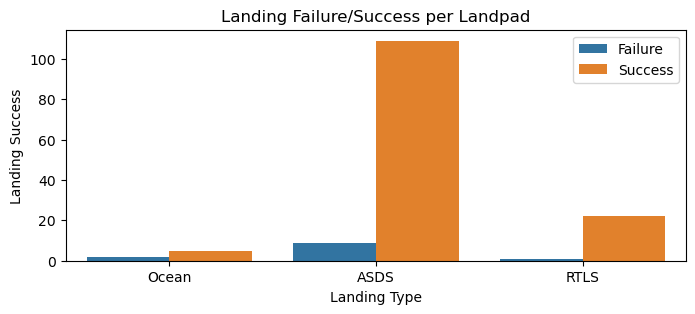

In [25]:
plt.figure(figsize=(8,3))
sns.countplot(df_spacex, x='Landing Type', hue='Landing Success')
plt.xlabel('Landing Type')
plt.ylabel('Landing Success')
plt.title('Landing Failure/Success per Landpad')
plt.legend(['Failure', 'Success'])
plt.show()

We see

In [55]:
joblib.dump([df_spacex, data], 'df_spacex.joblib')

['df_spacex.joblib']

In [2]:
loaded_objects = joblib.load('df_spacex.joblib')

In [3]:
df_spacex = loaded_objects[0]
data = loaded_objects[1]